<h1 align="center">🔍 KHÁM PHÁ DỮ LIỆU</h1>


<h1 align="center">📖 Mục lục</h1>

- [I. Tổng quan dữ liệu và tóm tắt vấn đề](#i)
    - [1. Thông tin về bộ dữ liệu từ Kaggle](#i1)
    - [2. Bổ sung thư viện hỗ trợ](#i2)
    - [3. Đọc dữ liệu](#i3)
    - [4. Thông tin cơ bản của dữ liệu](#i4)
- [II. Tiền xử lí dữ liệu](#ii)
- [III. Phân bố của dữ liệu](#iii)
    - [1. Sự phân bố các cột giá trị numerical](#iii1)
    - [2. Sự phân bố các cột giá trị categorical](#iii2)
- [IV. Lưu dữ liệu](#iv)


## I. Tổng quan dữ liệu và tóm tắt vấn đề <a id="i"></a>

### 1. Thông tin về bộ dữ liệu từ Kaggle <a id="i1"></a>



#### **Student Depression Dataset: Analyzing Mental Health Trends and Predictors Among Students**

#### **Overview**

This dataset compiles a wide range of information aimed at understanding, analyzing, and predicting depression levels among students. It is designed for research in psychology, data science, and education, providing insights into factors that contribute to student mental health challenges and aiding in the design of early intervention strategies.

#### **Data Description**
* Format: CSV (each row represents an individual student)
* Features:
    * ID: Unique identifier for each student
    * Demographics: Age, Gender, City
    * Academic Indicators: CGPA, Academic Pressure, Study Satisfaction
    * Lifestyle & Wellbeing: Sleep Duration, Dietary Habits, Work Pressure, Job Satisfaction, Work/Study Hours
    * Additional Factors: Profession, Degree, Financial Stress, Family History of Mental Illness, and whether the student has ever had suicidal thoughts
* Target Variable:
    * Depression_Status: A binary indicator (0/1 or Yes/No) that denotes whether a student is experiencing depression

#### **Key Highlights**

* Multifaceted Data: Integrates demographic, academic, and lifestyle factors to offer a comprehensive view of student wellbeing.

* Ethical Considerations: Data collection adhered to strict ethical standards with an emphasis on privacy, informed consent, and anonymization.

* Research & Practical Applications: Ideal for developing predictive models, conducting statistical analyses, and informing mental health intervention strategies in educational environments.

- Usage & Potential Applications

* Academic Research: Explore correlations between academic pressures and mental health trends.

* Data Science Projects: Build predictive models to identify at-risk students based on various indicators.

* Policy Making: Inform the development of targeted mental health support programs within academic institutions.

#### **Ethical Note**

Due to the sensitive nature of the data, please ensure that any analysis or published results respect privacy and ethical guidelines. Users of this dataset should be mindataul of the ethical implications when interpreting and sharing insights.

### 2. Bổ sung các thư viện hỗ trợ <a id="i2"></a>

In [1]:
data_folder_path="../../dataset"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import re
import numpy as np
import math
from matplotlib.gridspec import GridSpec

Set biến toàn cục

### 3. Đọc dữ liệu <a id="i3"></a>

In [3]:
data=pd.read_csv(f"{data_folder_path}/raw_data.csv",sep=',',header=0,encoding="utf-8")

Kiểm tra mẫu dữ liệu

In [4]:
data.head(5)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


### 4. Thông tin cơ bản của dữ liệu <a id="i4"></a>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

#### 4.a Dữ liệu có bao nhiêu dòng và cột ?

In [6]:
data.shape

(27901, 18)

Bộ dữ liệu bao gồm 27901 dòng và 18 cột thuộc tính

#### 4.b Ý nghĩa của mỗi dòng dữ liệu là gì ?

Mỗi dòng dữ liệu là một ghi nhận/ khảo sát của các cá nhân riêng biệt về vấn đề trầm cảm bao gồm các thông tin cá nhân đa dạng thuộc các nhóm như sinh học, học thuật, lối sống, gia đình... 

#### 4.c Dữ liệu có bị trùng lắp không ?

In [7]:
data.duplicated().sum()

0

Dữ liệu không ghi nhận trùng lắp giữa các cá nhân được khảo sát.

#### 4.d Ý nghĩa của các cột dữ liệu là gì ?

| Cột                                   | Mô tả                                                         |
|---------------------------------------|---------------------------------------------------------------|
| id                                    | Mã định danh                                                  |
| Gender                                | Giới tính                                                     |
| Age                                   | Tuổi của sinh viên                                            |
| City                                  | Thành phố cư trú                                              |
| Profession                            | Nghề nghiệp                                                   |
| Academic Pressure                     | Áp lực học tập                                                |
| Work Pressure                         | Áp lực công việc                                              |
| CGPA                                  | Điểm trung bình tích luỹ                                      |
| Study Satisfaction                    | Mức độ hài lòng với học tập                                   |
| Job Satisfaction                      | Mức độ hài lòng với công việc                                 |
| Sleep Duration                        | Thời gian ngủ trung bình                                      |
| Dietary Habits                        | Chất lượng thói quen ăn uống                                  |
| Degree                                | Bằng cấp cá nhân đang theo đuổi                               |
| Have you ever had suicidal thoughts ? | Cá nhân đã bao giờ có ý định tự sát chưa?                     |
| Work/Study Hours                      | Thời gian dành cho học tập/ làm việc                          |
| Financial Stress                      | Áp lực tài chính                                              |
| Family History of Mental Illness      | Gia đình có tiền sử bệnh tâm lý                               |
| Depression                            | Có hay không mắc trầm cảm                                     |


#### 4.e Kiểu dữ liệu và vấn đề của dữ liệu

In [8]:
data.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

Nhận xét: bộ dữ liệu sạch sẽ về mặt toàn vẹn dữ liệu, không có dữ liệu nào bị trùng lặp hay missing. Kiểu dữ liệu tương đối phù hợp với ý nghĩa của mỗi cột. Ở phần sau sẽ đi sâu vào xem xét các giá trị của từng dữ liệu để thực hiện chỉnh sửa phù hợp cho việc trực quan hoá dữ liệu.

## II. Tiền xử lý dữ liệu <a id="ii"></a>

Tổng quan về bộ dữ liệu không xảy ra các vấn đề cơ bản như isnull, trùng lắp... nên ta sẽ tiến hành xử lý dữ liệu cho từng cột dữ liệu, phân tích và đưa về dạng phù hợp cho việc trực quan.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

### Thuộc tính `id`: Thuộc tính này hiện có kiểu dữ liệu int và có miền giá trị không liên tục tuy nhiên không thể hiện sự ảnh hưởng đến quá trình trực quan và không có ý nghĩa trực quan

### Thuộc tính `Gender`

In [11]:
data['Gender'].value_counts()

Gender
Male      15547
Female    12354
Name: count, dtype: int64

Thuộc tính `Gender` thể hiện giới tính của cá nhân được khảo sát, bộ dữ liệu chỉ bao gồm 2 giới tính được ghi nhân là 'Male- Nam' và 'Female- Nữ'.

Thuộc tính hiện có phân bố số lượng giữa hai phân loại tương đối đồng đều, không có sự chênh lệch đáng kể.

Tuy nhiên sẽ phù hợp hơn nếu chuyển dữ liệu về kiểu dữ liệu Categorical.


In [12]:
data['Gender']=data['Gender'].astype('category')

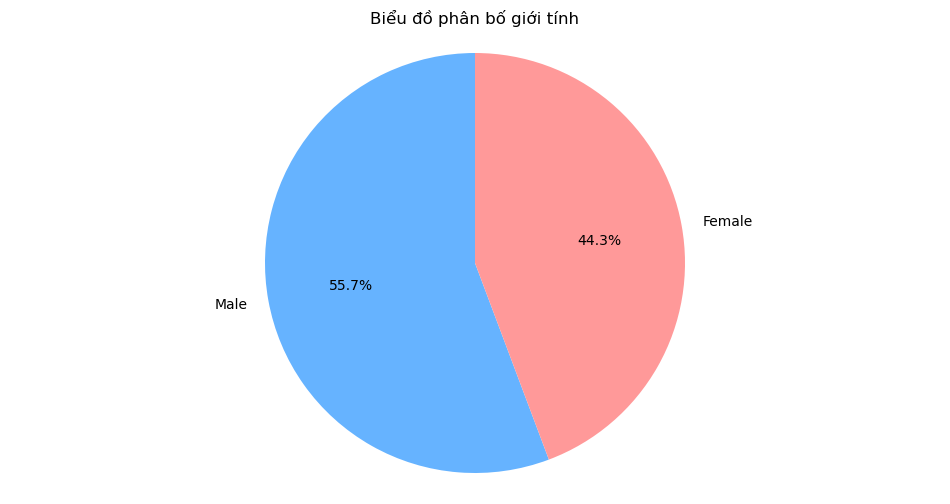

In [13]:
gender_counts=data['Gender'].value_counts()
plt.figure(figsize=(12,6))
plt.pie(gender_counts,labels=gender_counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'], startangle=90)
plt.title('Biểu đồ phân bố giới tính')
plt.axis('equal')  # Giữ hình tròn không bị méo
plt.show()

### Thuộc tính `Age`

Thuộc tính thể hiện độ tuổi của sinh viên, nên chuyển về kiểu dữ liệu int cho phù hợp hơn

In [14]:
data['Age']=data['Age'].astype('int64')

### Thuộc tính `City`

In [15]:
data['City'].unique()

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi', 'Saanvi', 'M.Tech', 'Bhavna', "'Less Delhi'",
       'City', '3.0', "'Less than 5 Kalyan'", 'Mira', 'Harsha', 'Vaanya',
       'Gaurav', 'Harsh', 'Reyansh', 'Kibara', 'Rashi', 'ME', 'M.Com',
       'Nalyan', 'Mihir', 'Nalini', 'Nandini', 'Khaziabad'], dtype=object)

In [16]:
data['City'].value_counts()

City
Kalyan                  1570
Srinagar                1372
Hyderabad               1340
Vasai-Virar             1290
Lucknow                 1155
Thane                   1139
Ludhiana                1111
Agra                    1094
Surat                   1078
Kolkata                 1066
Jaipur                  1036
Patna                   1007
Visakhapatnam            969
Pune                     968
Ahmedabad                951
Bhopal                   934
Chennai                  885
Meerut                   825
Rajkot                   816
Delhi                    768
Bangalore                767
Ghaziabad                745
Mumbai                   699
Vadodara                 694
Varanasi                 685
Nagpur                   651
Indore                   643
Kanpur                   609
Nashik                   547
Faridabad                461
Saanvi                     2
Bhavna                     2
City                       2
Harsha                     2
Kibara   

Phân tích cho thấy hầu hết các thành phố trên thuộc về quốc gia Ấn Độ (India) tuy nhiên cũng có các giá trị lạ không phải tên các thành phố lớn tại Ấn Độ, đây có thể là các đơn vị hành chính nhỏ hơn. May mắn các giá trị này chỉ có 1-2 mẫu nên để đảm bảo việc phân tích và trực quan dễ dàng và tổng quát hơn ta sẽ tiến hành xoá các giá trị này

In [17]:
data = data[data['City'].isin(data['City'].value_counts()[lambda x: x >= 10].index)]
data['City'].unique()

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi'], dtype=object)

In [18]:
data['City']=data['City'].astype('category')

### Thuộc tính `Profession`

In [19]:
data['Profession'].unique()

array(['Student', "'Civil Engineer'", 'Architect', "'UX/UI Designer'",
       "'Digital Marketer'", "'Content Writer'",
       "'Educational Consultant'", 'Teacher', 'Manager', 'Chef', 'Doctor',
       'Lawyer', 'Entrepreneur', 'Pharmacist'], dtype=object)

In [20]:
data['Profession'].value_counts()

Profession
Student                     27844
Architect                       8
Teacher                         6
'Digital Marketer'              3
'Content Writer'                2
Chef                            2
Doctor                          2
Pharmacist                      2
'Civil Engineer'                1
'UX/UI Designer'                1
'Educational Consultant'        1
Manager                         1
Lawyer                          1
Entrepreneur                    1
Name: count, dtype: int64

Có thể nhận thấy đa số người tham gia khảo sát đều là sinh viên, số ít còn lại đều là những người đã đi làm và đang tiếp tục học tập.

In [21]:
data['Profession']=data['Profession'].astype('category')

### Thuộc tính `Academic Pressure`

In [22]:
data['Academic Pressure'].unique()

array([5., 2., 3., 4., 1., 0.])

In [23]:
data['Academic Pressure']=data['Academic Pressure'].astype('int64')

Không có sự bất thường trong dữ liệu

### Thuộc tính `Work Pressure`

In [24]:
data['Work Pressure']=data['Work Pressure'].astype('int64')
data['Work Pressure'].value_counts()

Work Pressure
0    27872
5        2
2        1
Name: count, dtype: int64

### Thuộc tính `CGPA`

In [25]:
data['CGPA']=data['CGPA'].astype('float')

In [26]:
data['CGPA'].max()

10.0

In [27]:
data['CGPA'].min()

0.0

Không có sự bất thường trong miền giá trị điểm của thuộc tính điểm trung bình tích luỹ- CGPA

### Thuộc tính `Study Satisfaction`

In [28]:
data['Study Satisfaction']=data['Study Satisfaction'].astype('int64')
data['Study Satisfaction'].value_counts()

Study Satisfaction
4    6355
2    5831
3    5818
1    5442
5    4419
0      10
Name: count, dtype: int64

Không có sự bất thường về miền giá trị của dữ liệu

### Thuộc tính `Job Satisfaction`

In [29]:
data['Job Satisfaction'].unique()

array([0., 3., 4., 2., 1.])

In [30]:
data['Job Satisfaction']=data['Job Satisfaction'].astype('int64')
data['Job Satisfaction'].value_counts()

Job Satisfaction
0    27867
2        3
4        2
1        2
3        1
Name: count, dtype: int64

Không có sự bất thường về miền giá trị của dữ liệu

### Thuộc tính `Sleep Duration`

In [31]:
data['Sleep Duration'].unique()

array(["'5-6 hours'", "'Less than 5 hours'", "'7-8 hours'",
       "'More than 8 hours'", 'Others'], dtype=object)

In [32]:
data['Sleep Duration']=data['Sleep Duration'].astype('category')
data['Sleep Duration'].value_counts()

Sleep Duration
'Less than 5 hours'    8303
'7-8 hours'            7336
'5-6 hours'            6177
'More than 8 hours'    6041
Others                   18
Name: count, dtype: int64

Dữ liệu phân bố đồng đều

### Thuộc tính `Dietary Habits`

In [33]:
data['Dietary Habits'].unique()

array(['Healthy', 'Moderate', 'Unhealthy', 'Others'], dtype=object)

In [34]:
data['Dietary Habits'].value_counts()

Dietary Habits
Unhealthy    10304
Moderate      9915
Healthy       7644
Others          12
Name: count, dtype: int64

In [35]:
data['Dietary Habits']=data['Dietary Habits'].astype('category')

Nhận xét: thuộc tính `Dietary Habits` mô tả thói quen ăn uống của các cá nhân được khảo sát, có thể thấy sự phân bố dữ liệu đều giữa các nhóm phổ biến, chỉ ghi nhận 12 trường hợp có giá trị 'Others'

### Thuộc tính `Degree`

In [36]:
data['Degree'].unique()

array(['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', 'PhD', "'Class 12'",
       'B.Ed', 'LLB', 'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'MA',
       'B.Com', 'MD', 'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech',
       'BBA', 'ME', 'MHM', 'Others'], dtype=object)

In [37]:
data['Degree']=data['Degree'].astype('category')
data['Degree'].value_counts()

Degree
'Class 12'    6075
B.Ed          1864
B.Com         1505
B.Arch        1478
BCA           1431
MSc           1188
B.Tech        1152
MCA           1044
M.Tech        1021
BHM            924
BSc            888
M.Ed           819
B.Pharm        810
M.Com          734
BBA            696
MBBS           695
LLB            670
BE             611
BA             598
M.Pharm        582
MD             571
MBA            561
MA             544
PhD            522
LLM            481
MHM            191
ME             185
Others          35
Name: count, dtype: int64

Bảng thống kê trên cho thấy có sự đa dạng rất lớn về cả nội dung lẫn số lượng đối với bằng cấp mong đợi của các cá nhân được khảo sát trên mọi lĩnh vực lẫn trình độ. Nhưng nhìn chung không có vấn đề gì về dữ liệu

### Thuộc tính `Have you ever had suicidal thoughts ?`

In [38]:
data['Have you ever had suicidal thoughts ?'].unique()

array(['Yes', 'No'], dtype=object)

In [39]:
data['Have you ever had suicidal thoughts ?']=data['Have you ever had suicidal thoughts ?'].astype('category')
data['Have you ever had suicidal thoughts ?'].value_counts()


Have you ever had suicidal thoughts ?
Yes    17640
No     10235
Name: count, dtype: int64

Có thể thấy kết quả thống kê có sự bất ngờ khi ghi nhận một lượng lớn câu trả lời "Yes" cho nội dung câu hỏi này. Đồng thời cũng có sự cân bằng, chênh lệch không tuyệt đối giữa hai nhóm giá trị giúp việc phân tích kĩ hơn về sau được đảm bảo

### Thuộc tính `Financial Stress`

In [40]:
data['Financial Stress'].unique()

array(['1.0', '2.0', '5.0', '3.0', '4.0', '?'], dtype=object)

In [41]:
data['Financial Stress'].value_counts()

Financial Stress
5.0    6707
4.0    5774
3.0    5223
1.0    5114
2.0    5054
?         3
Name: count, dtype: int64

In [42]:
data = data[data['Financial Stress'] != '?']

In [43]:
data['Financial Stress']=pd.to_numeric(data['Financial Stress'])
data['Financial Stress']=data['Financial Stress'].astype('int64')

In [44]:
data['Financial Stress'].value_counts()

Financial Stress
5    6707
4    5774
3    5223
1    5114
2    5054
Name: count, dtype: int64

Ta ghi nhận được 3 trường hợp có giá trị "?" về vấn đề này, do số lượng ít nên ta có thể dễ dàng loại bỏ các cá nhân này mà không ảnh hưởng đến kết quả phân tích tổng thể. Sau đó chuyển thành kiểu int do đây là kiểu dữ liệu có thứ tự.

### Thuộc tính `Family History of Mental Illness`

In [45]:
data['Family History of Mental Illness'].unique()

array(['No', 'Yes'], dtype=object)

In [46]:
data['Family History of Mental Illness']=data['Family History of Mental Illness'].astype('category')
data['Family History of Mental Illness'].value_counts()

Family History of Mental Illness
No     14381
Yes    13491
Name: count, dtype: int64

Thống kê cho thấy hai trường giá trị có số lượng tương đương nhau

### Thuộc tính `Work/Study Hours`

In [47]:
data['Work/Study Hours'].unique()

array([ 3.,  9.,  4.,  1.,  0., 12.,  2., 11., 10.,  6.,  8.,  5.,  7.])

In [48]:
data['Work/Study Hours']=data['Work/Study Hours'].astype('int64')

In [49]:
data['Work/Study Hours'].value_counts()

Work/Study Hours
10    4230
12    3168
11    2889
8     2507
6     2243
9     2025
7     1997
0     1698
4     1614
2     1586
3     1469
5     1296
1     1150
Name: count, dtype: int64

Nhận xét: dữ liệu phân bố đồng đều và tương đối hợp lý, chưa phát hiện giá trị không phù hợp

### Thuộc tính `Depression`

In [50]:
data['Depression'].unique()

array([1, 0], dtype=int64)

In [51]:
data['Depression']=data['Depression'].astype('category')

## III. Phân bố của dữ liệu <a id="iii"></a>

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27872 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   id                                     27872 non-null  int64   
 1   Gender                                 27872 non-null  category
 2   Age                                    27872 non-null  int64   
 3   City                                   27872 non-null  category
 4   Profession                             27872 non-null  category
 5   Academic Pressure                      27872 non-null  int64   
 6   Work Pressure                          27872 non-null  int64   
 7   CGPA                                   27872 non-null  float64 
 8   Study Satisfaction                     27872 non-null  int64   
 9   Job Satisfaction                       27872 non-null  int64   
 10  Sleep Duration                         27872 non-null  category

### 1. Sự phân bố các cột giá trị numerical <a id="iii1"></a>

In [53]:
num_cols=data.select_dtypes(include=['int64', 'float']).columns.tolist()
num_cols

['id',
 'Age',
 'Academic Pressure',
 'Work Pressure',
 'CGPA',
 'Study Satisfaction',
 'Job Satisfaction',
 'Work/Study Hours',
 'Financial Stress']

In [54]:
num_cols.remove('Job Satisfaction')
num_cols.remove('id')

In [55]:
num_data=data[num_cols]
Q1=num_data.quantile(0.25)
Q3=num_data.quantile(0.75)
IQR=Q3-Q1
outliers = (num_data < (Q1 - 1.5 * IQR)) | (num_data > (Q3 + 1.5 * IQR))
outliers.sum()

Age                   12
Academic Pressure      0
Work Pressure          3
CGPA                   9
Study Satisfaction     0
Work/Study Hours       0
Financial Stress       0
dtype: int64

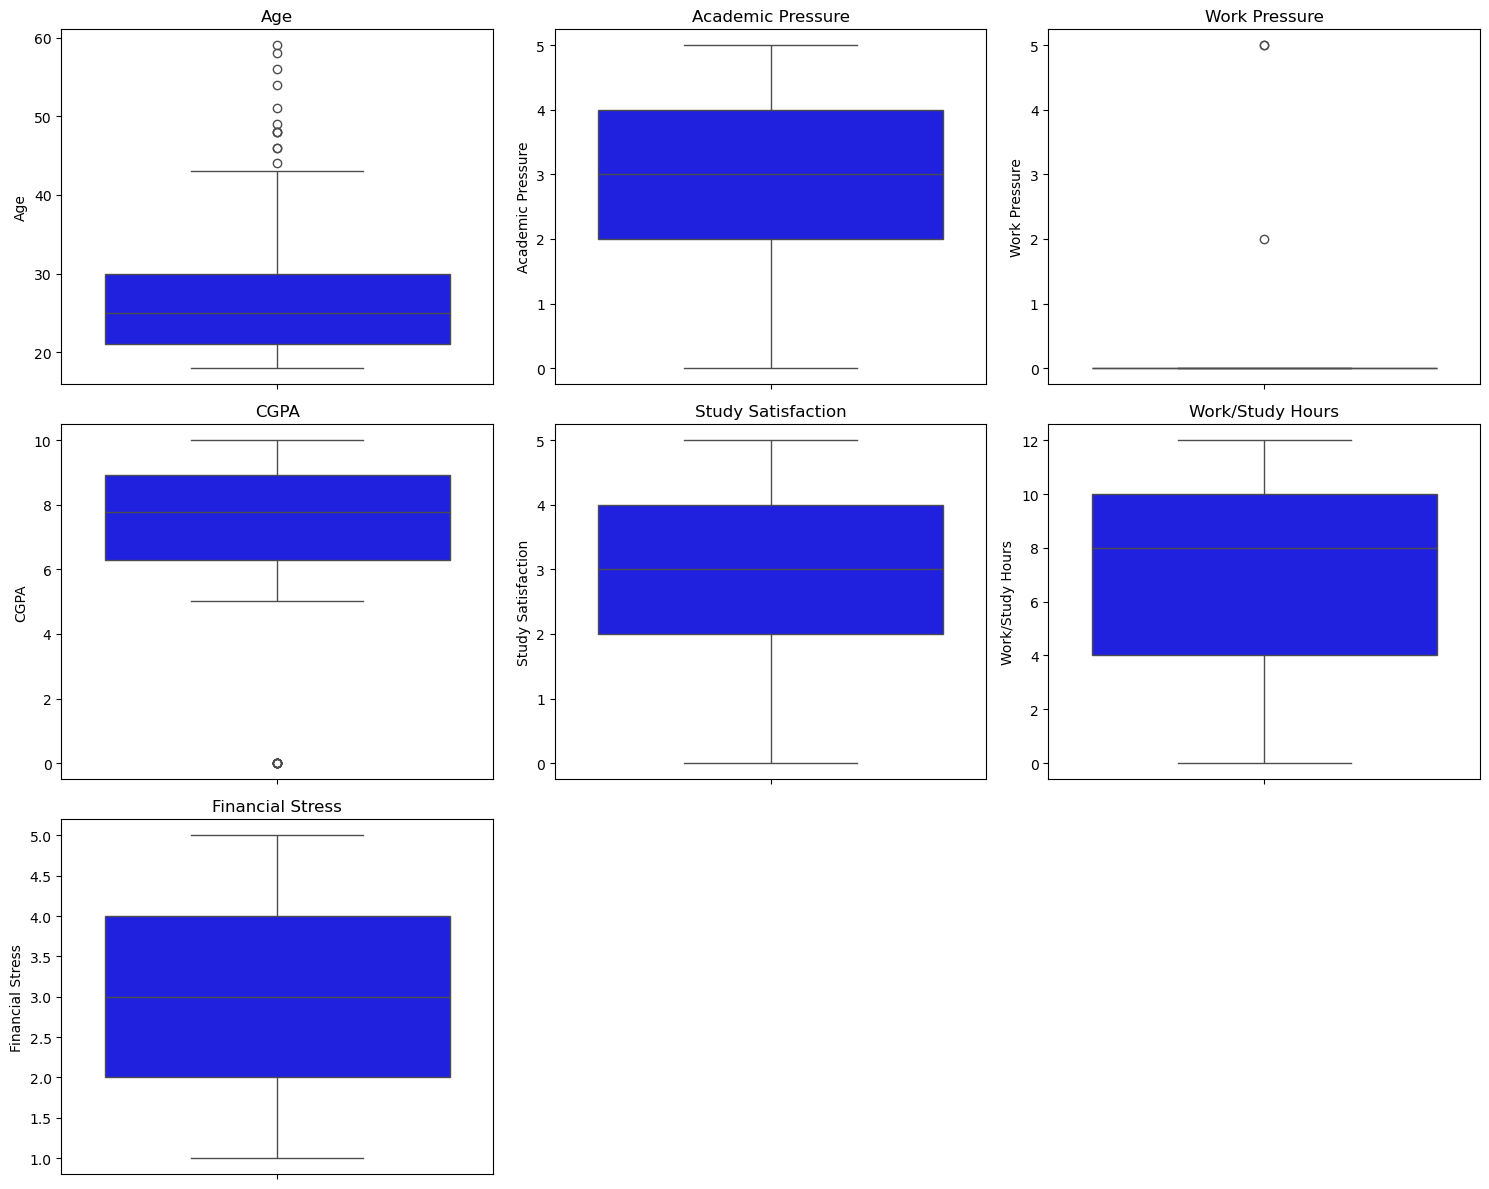

In [56]:
cols = num_cols
n_cols = len(cols)
n_rows = math.ceil(n_cols / 3)  

plt.figure(figsize=(15, n_rows * 4))  

for idx, col in enumerate(cols, 1):
    plt.subplot(n_rows, 3, idx)  
    sns.boxplot(y=num_data[col], color='blue')
    plt.title(col)
    plt.tight_layout()

plt.show()

Nhận xét:
* Có thể thấy biểu đồ boxplot thể hiện phân phối và xác định trung vị tương đối của các biến kiểu số đẹp, rất ít giá trị ngoại lai và cũng có sự phân bố đa dạng.
* `Age` là thuộc tính chứa nhiều giá trị ngoại lai nhất tuy nhiên cũng không đáng kể, điều này là do hầu hết đối tượng được khảo sát là sinh viên nên độ tuổi thông thường sẽ từ 20-30 nên các cá nhân lớn tuổi hơn tiếp tục học tại trường sẽ thành giá trị ngoại lai. Điều này phù hợp ngoài thực tế nên không được coi là giá trị không hợp lý.
* `Work Pressure` có biểu đồ thể hiện kì lạ bởi do hầu như toàn bộ người thực hiện khảo sát là sinh viên chưa đi làm nên sẽ không có nhận định của họ về áp lực công việc. Điều này phù hợp tuy nhiên trong trường hợp này có thể cân nhắc loại bỏ do không có ý nghĩa hỗ trợ phân tích.

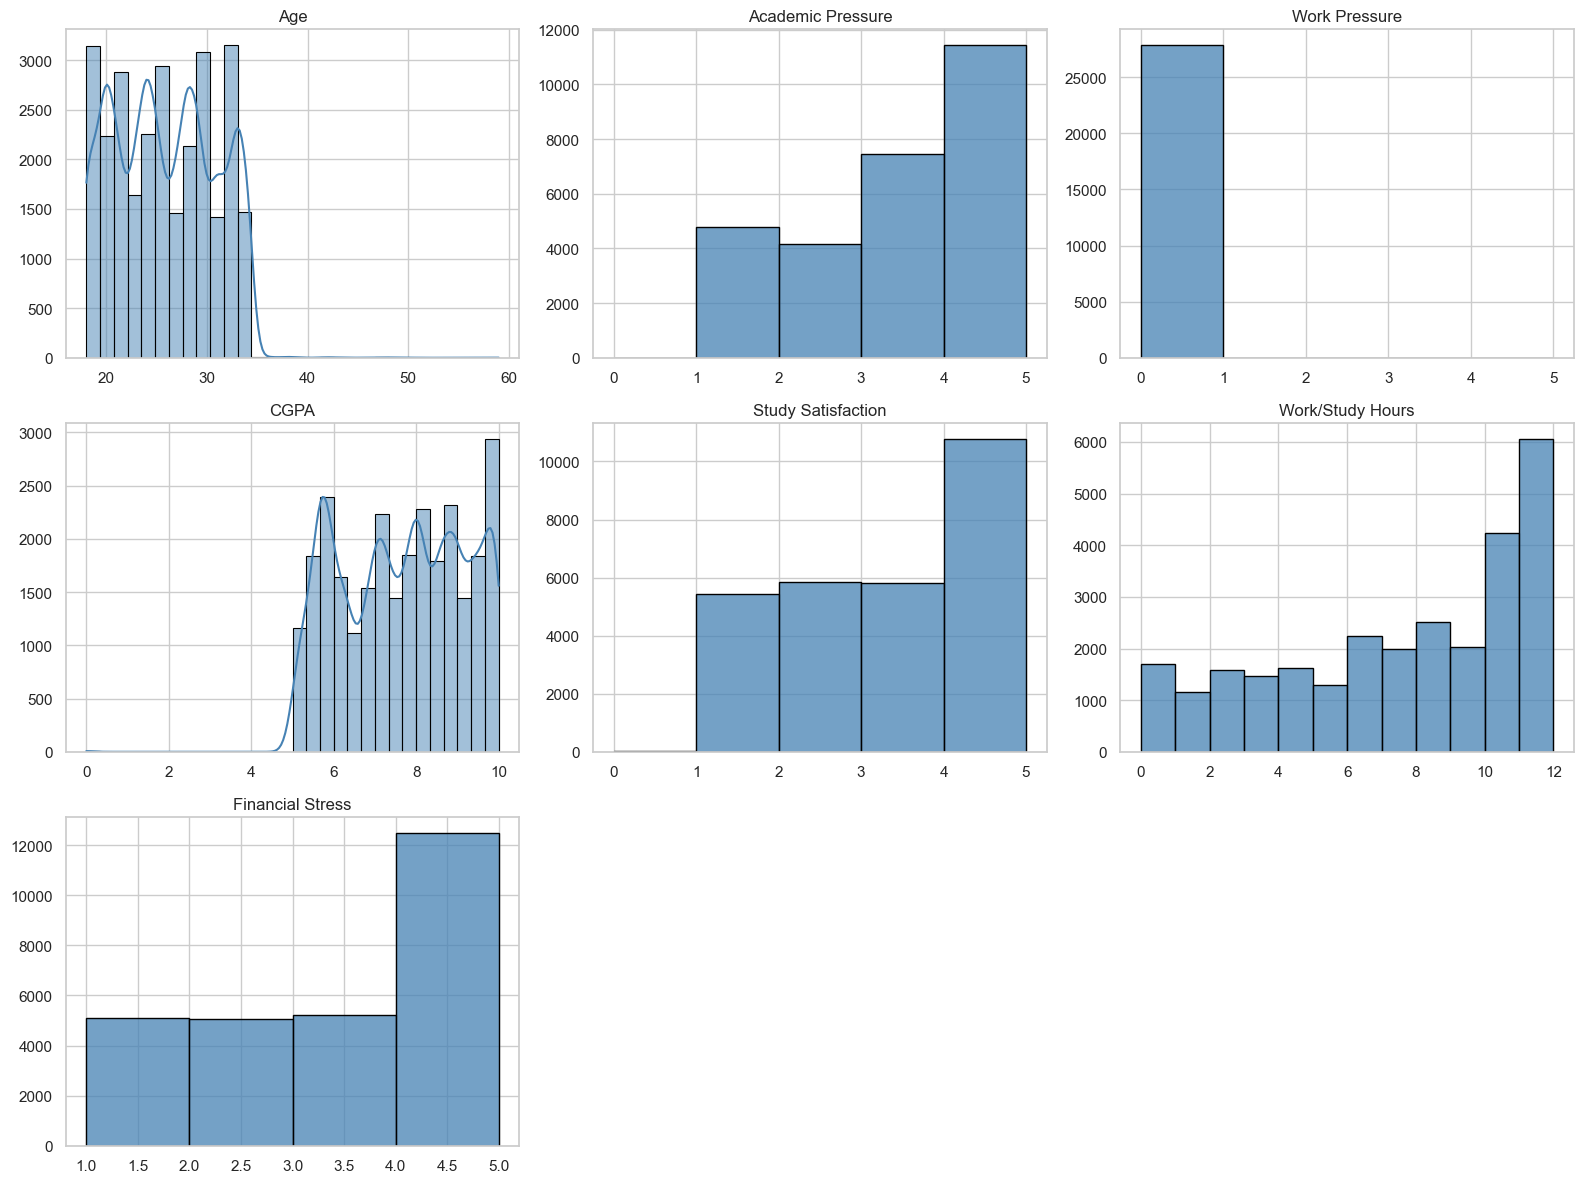

In [57]:
cols = num_cols 
n_cols = len(cols)
n_rows = math.ceil(n_cols / 3)

plt.figure(figsize=(16, n_rows * 4))
sns.set(style='whitegrid')

for idx, col in enumerate(cols, 1):
    plt.subplot(n_rows, 3, idx)
    data_col = num_data[col].dropna()
    
    # Kiểm tra số lượng giá trị duy nhất
    unique_vals = data_col.nunique()
    
    # Nếu là rời rạc, không dùng kde
    if unique_vals < 20:
        sns.histplot(data_col, bins=unique_vals, color='steelblue', edgecolor='black',binwidth=1)
    else:
        sns.histplot(data_col, kde=True, color='steelblue', edgecolor='black', bins=30)

    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


**Nhận xét**:
* Cột `Age`: có miền giá trị phân bố tập trung chủ yếu từ 20-30, lý giải cho điều này bởi hầu hết khảo sát được thực hiện bởi các đối tượng là học sinh, sinh viên.
* Cột `Academic Pressure`: Có thể thấy hầu như không có sinh viên nào không có áp lực học hành, số lượng của từng mức độ cũng có sự phân bố đồng đều, thậm chí số đối tượng có mức áp lực học tập đạt mức 5 chiếm số lượng nhiều nhất.
* Cột `Work Pressure`: Có sự chênh lệch cực kỳ rõ rệt, phần lớn sinh viên không có áp lực công việc (dồn về mức 0). Điều này dễ hiểu vì nhiều sinh viên chưa đi làm thêm hoặc chưa chịu áp lực tài chính từ công việc.

* Cột `CGPA`: Điểm trung bình tích lũy (GPA) có xu hướng tập trung từ khoảng 6 đến 9, phân bố gần như chuẩn, không có nhiều sinh viên bị điểm thấp. Điều này cho thấy đa phần sinh viên có kết quả học tập khá – giỏi.

* Cột `Study Satisfaction`: Mức độ hài lòng khi học tập tăng dần từ mức 1 đến 5, trong đó mức 4 và 5 chiếm tỷ lệ cao nhất. Điều này cho thấy phần lớn sinh viên cảm thấy tích cực với trải nghiệm học tập hiện tại.

* Cột `Work/Study Hours`: Có sự phân tán tương đối rộng, nhưng phần lớn tập trung ở mức 8–12 giờ/ngày. Điều này phản ánh khối lượng học tập/làm việc của sinh viên là khá lớn, có thể do học thêm hoặc làm thêm ngoài giờ.

* Cột `Financial Stress`: Mức độ căng thẳng tài chính cao, với phần lớn sinh viên chọn mức 5 (căng thẳng nhiều nhất). Có thể lý giải do phần đông sinh viên chưa có thu nhập ổn định và còn phụ thuộc tài chính vào gia đình.

### 2. Sự phân bố các cột giá trị categorical <a id="iii2"></a>

In [58]:
cat_cols=data.select_dtypes(include=['category']).columns.tolist()
cat_cols

['Gender',
 'City',
 'Profession',
 'Sleep Duration',
 'Dietary Habits',
 'Degree',
 'Have you ever had suicidal thoughts ?',
 'Family History of Mental Illness',
 'Depression']

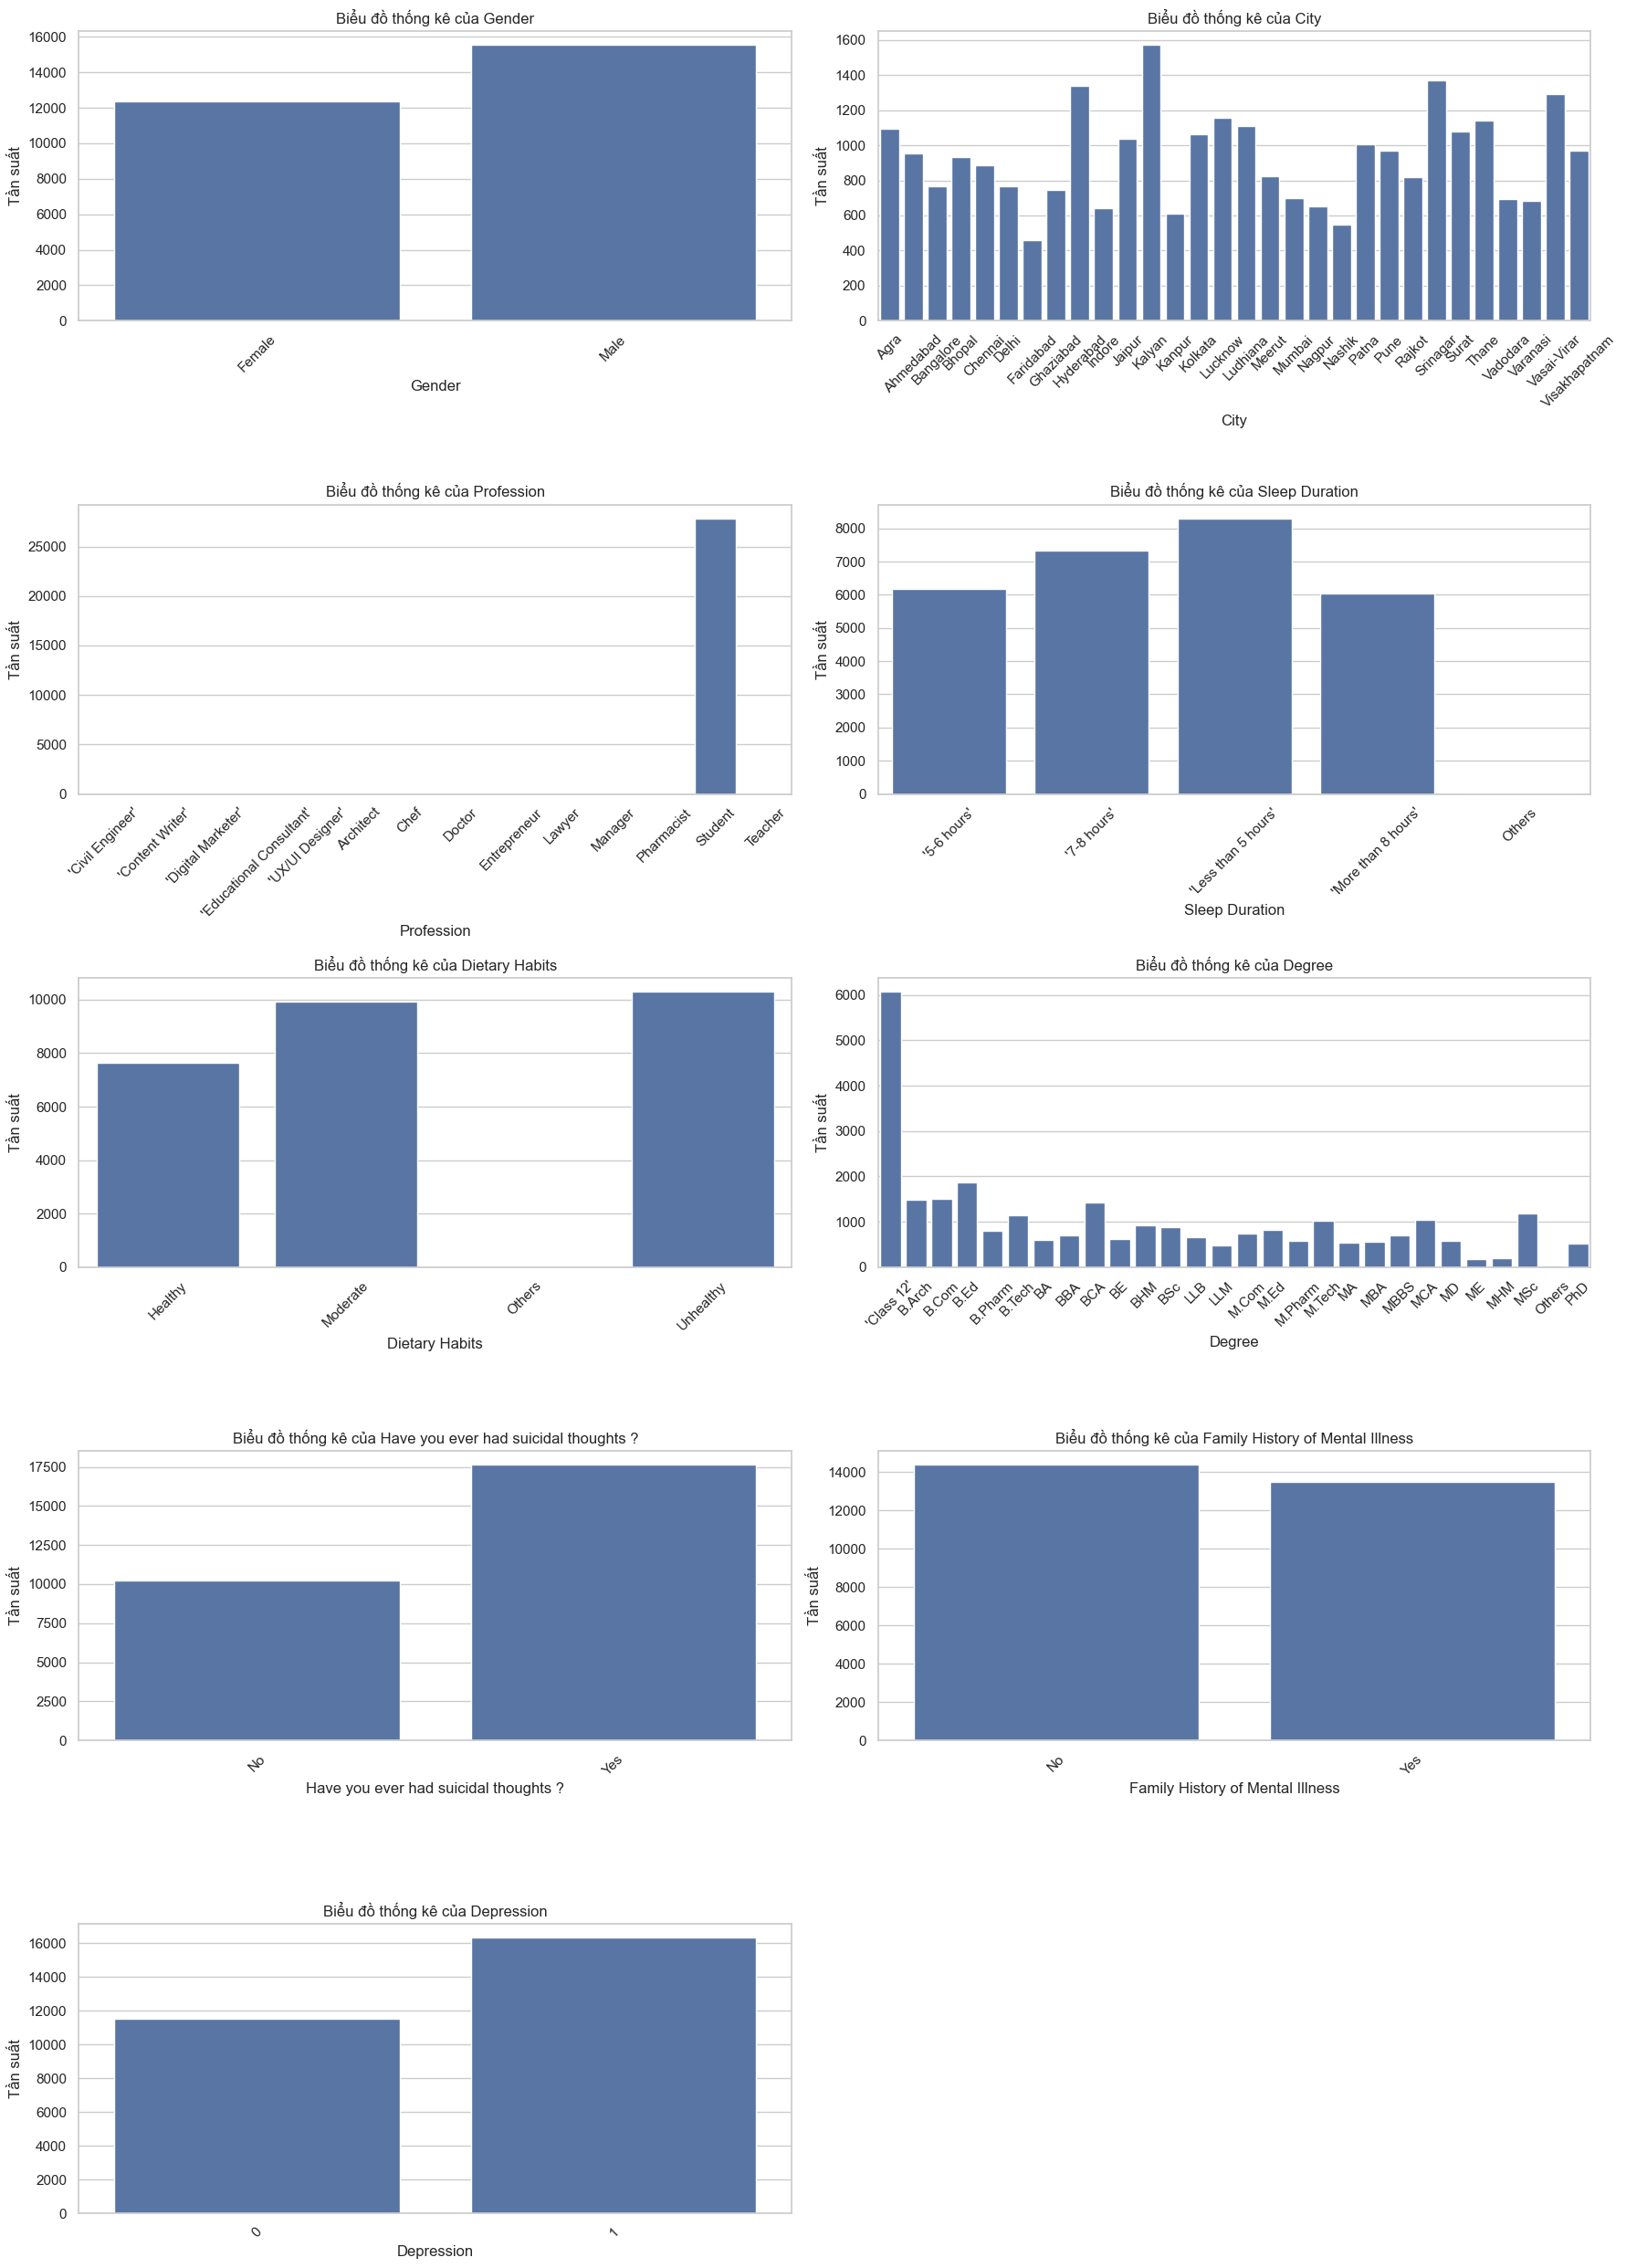

In [59]:
n_cols = 2
n_rows = math.ceil(len(cat_cols) / n_cols)

plt.figure(figsize=(18, n_rows * 5))
gs = GridSpec(n_rows, n_cols, height_ratios=[1]*n_rows)

for i, col in enumerate(cat_cols):
    ax = plt.subplot(gs[i // n_cols, i % n_cols])
    sns.barplot(
        x=data[col].value_counts().index,  
        y=data[col].value_counts().values, 
        ax=ax
    )
    ax.set_title(f'Biểu đồ thống kê của {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Tần suất')
    ax.tick_params(axis='x', rotation=45)  # xoay nhãn nếu cần

plt.tight_layout()
plt.show()

**Nhận xét:**
* Hầu như tất cả các thuộc tính có kiểu dữ liệu categorical đều có phân phối giữa các thành phần chính là tương đương nhau.
* Thuộc tính `Gender`: có sự cân bằng trong tỉ lệ số lượng giới tính của các cá nhân tham gia khảo sát, cho thấy khảo sát không chỉ thực hiện thiên hướng về 1 nhóm giới tính cố định.
* Thuộc tính `City`: dù có đến hơn 10 giá trị nơi cư trú của các cá nhân nhưng số lượng từng thành phần không có sự chênh lệch quá mức, cho thấy yếu tố môi trường sinh sống trở nên đa dạng.
* Thuộc tính `Profession`: hầu như toàn bộ đối tượng thực hiện khảo sát là Student, có thể cân nhắc loại bỏ cột giá trị này.
* Thuộc tính `Sleep Duration`: thể hiện giờ dành cho việc ngủ của sinh viên có sự phân bố đồng đều, điều này có thể lí giải bởi các sinh viên đều được tự do giờ giấc để sinh hoạt, học tập và giải trí.
* Thuộc tính `Dietary Habbit`: thể hiện chế độ dinh dưỡng của các sinh viên, số lượng phân bố đồng đều cho thấy bên cạnh một nhóm người có cân nhắc đến chế độ ăn hợp lý cũng có lượng lớn cá nhân có lối ăn uống kém hiệu quả, điều này có thể nằm ở vấn đề tài chính hoặc nhận thức bản thân.
* Thuộc tính `Degree`: bằng cấp một cá nhân theo đuổi cũng sẽ quyết định mức độ khó, dễ đối của việc học đối với từng cá nhân. Vượt qua lớp 12 hầu hết là mục tiêu của các cá nhân được khảo sát, tuy nhiên đối với những cá nhân theo đuổi việc học cao hơn thì cũng thể hiện sự đa dạng về ngành học lẫn học vị.
* Thuộc tính `Have you ever had suicidal thoughts ?`: đây là một thuộc tính quan trọng ảnh hưởng lớn đến khả năng trầm cảm của một cá nhân. Phần lớn khảo sát cho thấy các cá nhân này đều đã từng ít nhất 1 lần suy nghĩ đến việc tự sát.
* Thuộc tính `Family History of Mental Illness`: tương tự các thuộc tính khác, gần như có sự phân bố đồng đều của thuộc tính này, cũng cho thấy vấn đề tâm lý rất phổ biến ở Ấn Độ.
* Thuộc tính `Depression`: biểu đồ thể hiện tình trạng trầm cảm căng thẳng đối với các cá nhân được khảo sát khi mà hơn quá nửa các cá nhân được cho rằng mắc bệnh trầm cảm.

## IV. Lưu dữ liệu <a id="iv"></a>

In [60]:
data.to_csv(f"{data_folder_path}/processed_data.csv",index=False,encoding="utf-8")